# Notebook for demo how to get features with [neuron_morphology](https://github.com/AllenInstitute/neuron_morphology)

To obtain the package, please see [https://neuron-morphology.readthedocs.io/en/readthedocs/](https://neuron-morphology.readthedocs.io/en/readthedocs/).

This step-by-step guid will walk you through the whole process of getting the interested features with neuron_morphology.


In [1]:
import sys
sys.path.insert(0, "../")
#import warnings
#warnings.filterwarnings('ignore')

from io import StringIO
import requests
from neuron_morphology.swc_io import morphology_from_swc
from neuron_morphology.feature_extractor.data import Data
from neuron_morphology.feature_extractor.feature_extractor import FeatureExtractor
import neuron_morphology.feature_extractor.feature_writer as fw
from neuron_morphology.features.default_features import default_features

import matplotlib.pyplot as plt
import json
import numpy as np

## Pick your neuron (.swc/.csv)

Here select one SWC file as an example.

In [2]:
def data_from_url(morphology_url):
    morphology_swc = StringIO(requests.get(morphology_url).text)

    # Feature functions expect a Data object - in this case just a wrapper for a Morphology
    # If we were working with additional data (say, layer annotations) we would store these here as well
    return Data(morphology_from_swc(morphology_swc))

# fetch a published reconstruction
IVSCC_swc_file = "http://celltypes.brain-map.org/api/v2/well_known_file_download/491120375"

## Load SWC file as morphology data

We can load the SWC file into our morphology data object and then calculate features on it.

Text(0.5, 1.0, 'z-y view')

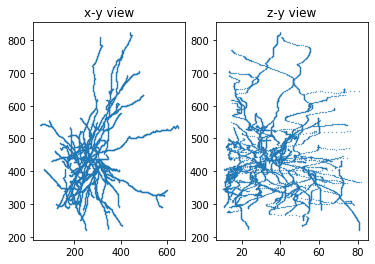

In [3]:
# fetch a published reconstruction 
test_data = data_from_url(IVSCC_swc_file)

# directly load a swc file given its file path
# test_data = Data(morphology_from_swc(IVSCC_swc_file))

nodes = test_data.morphology.nodes()

x = [node['x'] for node in nodes]
y = [node['y'] for node in nodes]
z = [node['z'] for node in nodes]

fig, ax = plt.subplots(1, 2)
ax[0].scatter(x, y, s=0.1)
ax[0].set_title('x-y view')
ax[1].scatter(z, y, s=0.1)
ax[1].set_title('z-y view')

## List default features to extract

## Register your interested features 

In this example, we register all the default features to extract.

In [5]:
fe = FeatureExtractor()
fe.register_features(default_features)

### Extracting features

In [6]:
feature_extraction_run = fe.extract(test_data)

2020-02-25 14:01:50,473 root         INFO     skipping mark (validation failed): type
2020-02-25 14:01:50,474 root         INFO     skipping mark (validation failed): type
/Users/matthew.aitken/allen_dev/neuron_morphology/neuron_morphology/feature_extractor/mark.py:118: UserWarning: This morphology is not uniquely rooted! Found 7 root nodes. Features using the root node of this morphology may not select that node consistently. Some or all of these root nodes may not be soma nodes.
  f"This morphology is not uniquely rooted! Found {num_roots} "
2020-02-25 14:01:50,488 root         INFO     skipping mark (validation failed): type
2020-02-25 14:01:50,488 root         INFO     selected marks: <bound method FeatureExtractionRun.select_marks of <neuron_morphology.feature_extractor.feature_extraction_run.FeatureExtractionRun object at 0x1a284286d8>>
2020-02-25 14:01:50,489 root         INFO     skipping feature: apical_dendrite.tip.dimension. Found extra marks: ['RequiresApical']
2020-02-25 1

2020-02-25 14:01:50,524 root         INFO     skipping feature: apical_dendrite.dendrite.earth_movers_distance. Found extra marks: ['RequiresReferenceLayerDepths', 'RequiresLayeredPointDepths', 'RequiresApical']
2020-02-25 14:01:50,525 root         INFO     skipping feature: basal_dendrite.dendrite.earth_movers_distance. Found extra marks: ['RequiresReferenceLayerDepths', 'RequiresLayeredPointDepths']
2020-02-25 14:01:50,526 root         INFO     selected features: ['all_neurites.tip.dimension', 'dendrite.tip.dimension', 'basal_dendrite.tip.dimension', 'axon.tip.dimension', 'all_neurites.compartment.dimension', 'dendrite.compartment.dimension', 'basal_dendrite.compartment.dimension', 'axon.compartment.dimension', 'all_neurites.bifurcation.dimension', 'dendrite.bifurcation.dimension', 'basal_dendrite.bifurcation.dimension', 'axon.bifurcation.dimension', 'all_neurites.node.dimension', 'dendrite.node.dimension', 'basal_dendrite.node.dimension', 'axon.node.dimension', 'all_neurites.num_nod

## Results

In [7]:
results = feature_extraction_run.results

from neuron_morphology.feature_extractor.utilities import unnest
unnest(results)

{'all_neurites.tip.dimension.width': 598.6509,
 'all_neurites.tip.dimension.height': 602.6546,
 'all_neurites.tip.dimension.depth': 71.02420000000001,
 'all_neurites.tip.dimension.min_xyz': array([-252.2122, -220.8229,  -15.61  ]),
 'all_neurites.tip.dimension.max_xyz': array([346.4387, 381.8317,  55.4142]),
 'all_neurites.tip.dimension.bias_xyz': array([ 94.2265, 161.0088,  39.8042]),
 'dendrite.tip.dimension.width': 384.2443999999999,
 'dendrite.tip.dimension.height': 209.35199999999998,
 'dendrite.tip.dimension.depth': 58.702,
 'dendrite.tip.dimension.min_xyz': array([ -86.8776, -151.2368,  -15.4   ]),
 'dendrite.tip.dimension.max_xyz': array([297.3668,  58.1152,  43.302 ]),
 'dendrite.tip.dimension.bias_xyz': array([210.4892,  93.1216,  27.902 ]),
 'basal_dendrite.tip.dimension.width': 384.2443999999999,
 'basal_dendrite.tip.dimension.height': 209.35199999999998,
 'basal_dendrite.tip.dimension.depth': 58.702,
 'basal_dendrite.tip.dimension.min_xyz': array([ -86.8776, -151.2368,  -1

##### Or save the features as h5 or csv file

In [8]:
heavy_path = "test_features.h5"
table_path = "test_features.csv"

features_writer = fw.FeatureWriter(heavy_path, table_path)
features_writer.add_run("test", feature_extraction_run.serialize())
features_writer.write_table()

/Users/matthew.aitken/allen_dev/neuron_morphology/neuron_morphology/feature_extractor/feature_writer.py:54: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.heavy_file = h5py.File(self.heavy_path, driver="core")


OSError: Unable to create file (unable to open file)